In [1]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt
from numpy import logical_and as land, logical_or as lor
import seaborn as sn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

DATA_PATH = '/content/drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_tweets = pd.read_csv(DATA_PATH+'tweets_clean.csv', sep='#')
df_users = pd.read_csv(DATA_PATH+'users_clean.csv', sep='#')

In [4]:
def plot_hist(dataframe, attribute_name, log=False):
    df = pd.DataFrame()

    if log:
        log_attribute_name = attribute_name+'_log'
        df[log_attribute_name] = np.log(dataframe[attribute_name].values)

        attribute_name = log_attribute_name
        df[attribute_name] = df[attribute_name].replace(-np.inf, 0)

    else:
        df[attribute_name] = dataframe[attribute_name].values
    n_bins = math.ceil(np.log2(len(df[attribute_name])) + 1) #Sturges' rule
    df.hist(attribute_name, bins = n_bins, log=True)

In [5]:
def plot_boxplot(df,col,log=False):
    #Plot the distribution of the indicated column
    plt.boxplot(df_tweets[df[col] != -1.0][col], showmeans=True)
    if log:
        plt.yscale('log')
    plt.show()

In [21]:
def eval_correlation(df_corr, method='pearson'):
    correlation_matrix = df_corr.corr(method=method)
    #sn.heatmap(correlation_matrix, annot=True)
    fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
    sn.heatmap(correlation_matrix, annot=True, linewidths=.5, ax=ax)
    plt.show()

## Plotting correlation matrix

As it can be seen from the plot, even after the process of data cleaning, no relevant correlation is present neither in the tweets dataset nor the users dataset, so all attributes can be kept.

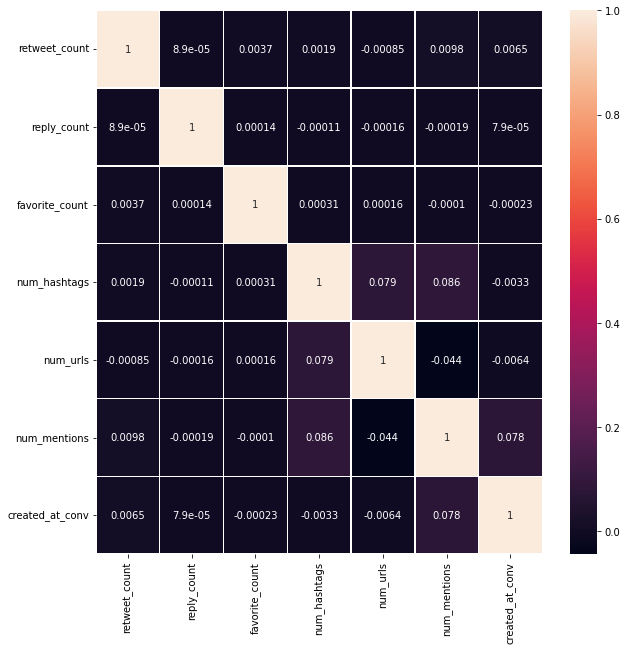

In [22]:
eval_correlation(df_tweets)

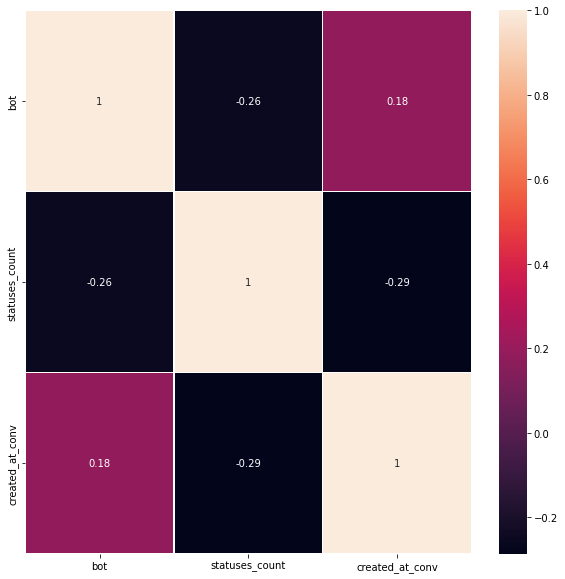

In [23]:
eval_correlation(df_users.drop(columns=['id']))

## Users Scatter plots

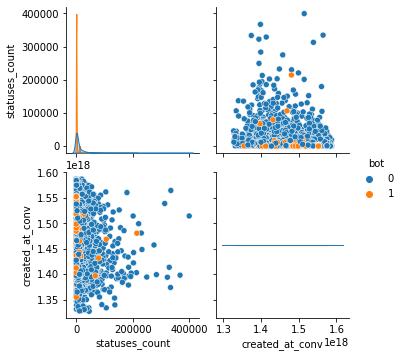

In [19]:
#pd.plotting.scatter_matrix(df_users, alpha=0.2)
sn.pairplot(df_users.drop(columns=['id']), hue='bot')

Analyzing how, varying the date of creation of the user profile, the language of the user changes, it is possible to see that:


*   Almost all bots profiles were created between 2014 and 2019;
*   All users who have their language set either to 'it' or 'zh-cn' are bots



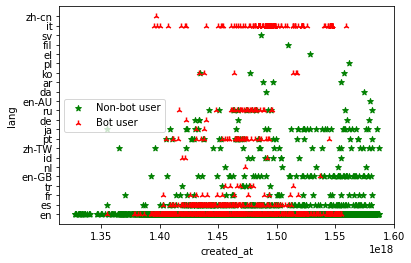

In [27]:
plt.scatter(df_users[df_users['bot'] == 0]['created_at_conv'], 
            df_users[df_users['bot'] == 0]['lang'], color='g', marker='*', label='Non-bot user')
plt.scatter(df_users[df_users['bot'] == 1]['created_at_conv'], 
            df_users[df_users['bot'] == 1]['lang'], color='r', marker='2', label='Bot user')
plt.xlabel('created_at')
plt.ylabel('lang')
plt.legend()
plt.show()

In [34]:
print('lower bound: ' + str(pd.to_datetime(1.40e18)))
print('upper bound: ' + str(pd.to_datetime(1.55e18)))

lower bound: 2014-05-13 16:53:20
upper bound: 2019-02-12 19:33:20


In [37]:
df_users[df_users['lang']=='it']['bot'].value_counts()

1    906
Name: bot, dtype: int64

Instead, always relatively to the data of creation, the statuses_count attribute is plotted. Very few bots have higher values of statuses_count, mostly the non-bot users have a greater number of posted tweets.

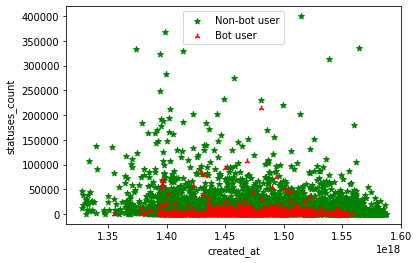

In [38]:
plt.scatter(df_users[df_users['bot'] == 0]['created_at_conv'], 
            df_users[df_users['bot'] == 0]['statuses_count'], color='g', marker='*', label='Non-bot user')
plt.scatter(df_users[df_users['bot'] == 1]['created_at_conv'], 
            df_users[df_users['bot'] == 1]['statuses_count'], color='r', marker='2', label='Bot user')
plt.xlabel('created_at')
plt.ylabel('statuses_count')
plt.legend()
plt.show()

## Tweets Scatter plots

In [ ]:
pd.plotting.scatter_matrix(df_tweets, alpha=0.2)

**Retweet count**

Even after the process of data cleaning, the distribution remains skewed with a majority of values tending towards the value 0.

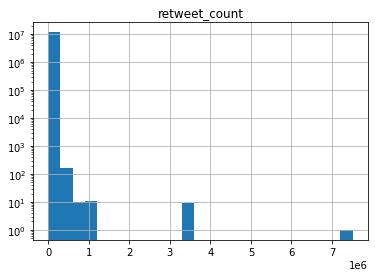

In [20]:
plot_hist(df_tweets, 'retweet_count')

W.r.t. the time of publishing of the tweet no special insights can be derived.

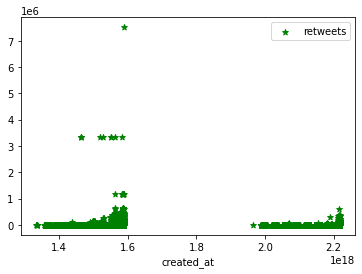

In [13]:
plt.scatter(df_tweets['created_at_conv'], 
            df_tweets['retweet_count'], color='g', marker='*', label='retweets')
plt.xlabel('created_at')
plt.legend()
plt.show()

**Favorite count**

As for the "retweet_count" attribute, the distribution has a peak near the values around 0.

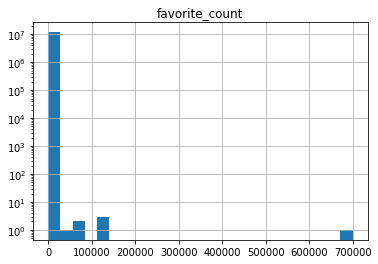

In [30]:
plot_hist(df_tweets, 'favorite_count')

Unlike for the previous attribute, w.r.t. the time of publishing of the tweet, here we have a presence of tweets with a higher number of favorites near the most recent dates.

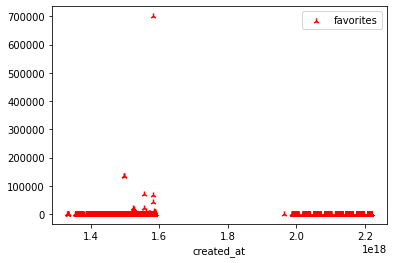

In [14]:
plt.scatter(df_tweets['created_at_conv'], 
            df_tweets['favorite_count'], color='r', marker='2', label='favorites')
plt.xlabel('created_at')
plt.legend()
plt.show()

**Reply count**

The distribution is similar to the previously analyzed attributes of the tweets file.

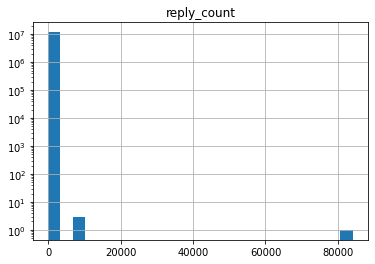

In [31]:
plot_hist(df_tweets, 'reply_count')

Even more so than the previous two attributes, here we have a higher number of replies almost all around the same date.

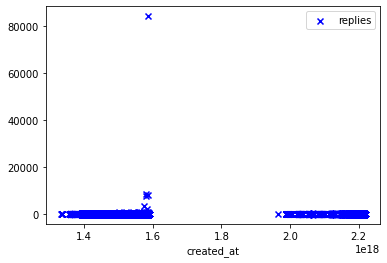

In [7]:
plt.scatter(df_tweets['created_at_conv'], 
            df_tweets['reply_count'], color='b', marker='x', label='replies')
plt.xlabel('created_at')
plt.legend()
plt.show()

**Num hashtags**

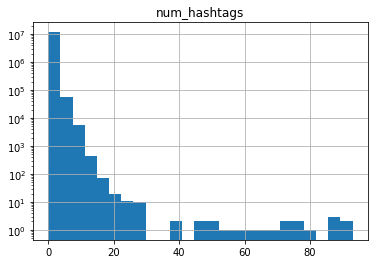

In [8]:
plot_hist(df_tweets, 'num_hashtags')

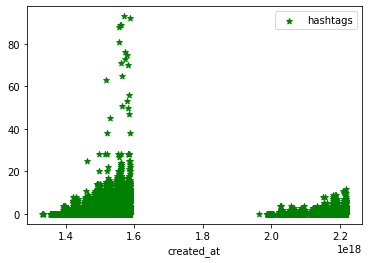

In [9]:
plt.scatter(df_tweets['created_at_conv'], 
            df_tweets['num_hashtags'], color='g', marker='*', label='hashtags')
plt.xlabel('created_at')
plt.legend()
plt.show()

**Num urls**

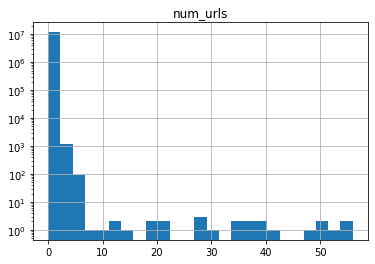

In [10]:
plot_hist(df_tweets, 'num_urls')

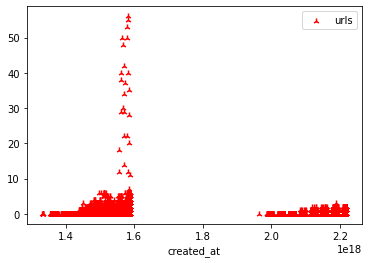

In [11]:
plt.scatter(df_tweets['created_at_conv'], 
            df_tweets['num_urls'], color='r', marker='2', label='urls')
plt.xlabel('created_at')
plt.legend()
plt.show()

**Num mentions**

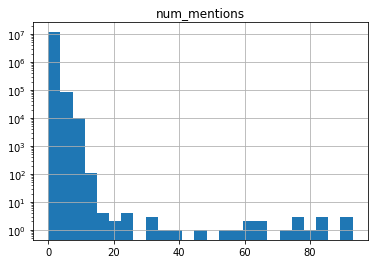

In [12]:
plot_hist(df_tweets, 'num_mentions')

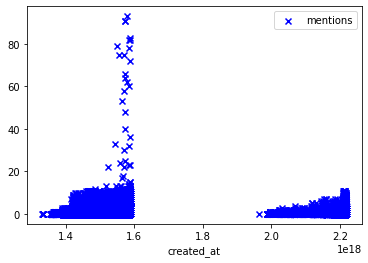

In [13]:
plt.scatter(df_tweets['created_at_conv'], 
            df_tweets['num_mentions'], color='b', marker='x', label='mentions')
plt.xlabel('created_at')
plt.legend()
plt.show()

## Users and Tweets Scatter plots

In [14]:
df_users.id = df_users.id.astype(str)
df_merge = df_tweets.merge(df_users, left_on="user_id", right_on="id", how="right")

In [16]:
df_merge.drop(columns=['id', 'name'], inplace=True)

Analyzing the attributes correlation by merging the two dataframes by "user_id" (respectively "id" in the users file) in such a way that all tweets posted by a user not present in the users file have been dropped it is possible to see that there are no significant correlations between data.

At best we can see a little bit of negative correlation between the attributes "num_mentions" and "bot" or "bot" and "statuses_count", but they are not really significant because the value is still too much near 0 (which means they aren't correlated).

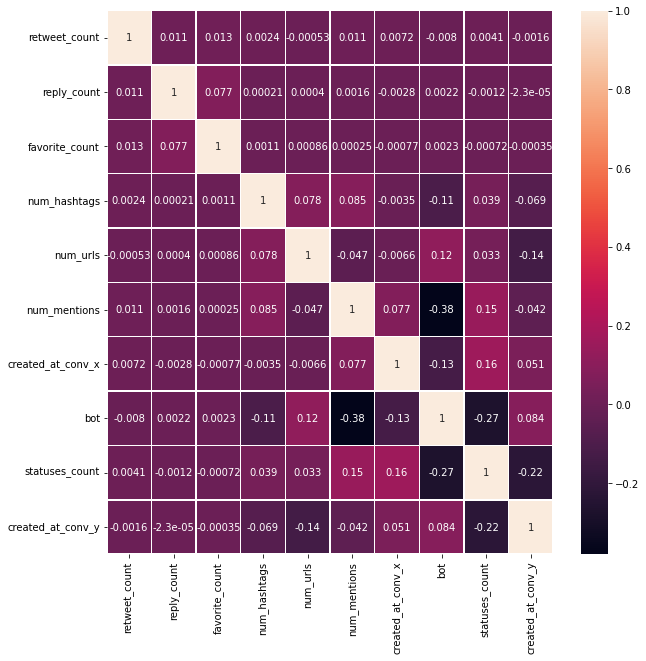

In [24]:
eval_correlation(df_merge)

Now it is possible to analyze the attributes of the tweets w.r.t. the "bot" class and derive the behavior of the users who are bots and the ones which aren't bots.

Almost all of the users who have higher retweet counts are non-bot users, which makes sense since they are most likely to be shared by other users, unlike tweets coming from bots which could often be spam and thus not be noticed by the Twitter community.

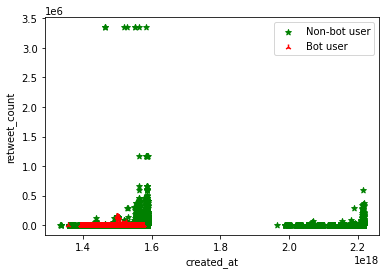

In [26]:
plt.scatter(df_merge[df_merge['bot'] == 0]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 0]['retweet_count'], color='g', marker='*', label='Non-bot user')
plt.scatter(df_merge[df_merge['bot'] == 1]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 1]['retweet_count'], color='r', marker='2', label='Bot user')
plt.xlabel('created_at')
plt.ylabel('retweet_count')
plt.legend()
plt.show()

A different situation arises when we consider the favorites, here they are mostly flat without any difference for bots and non-bots. The only different value registered is from a bot user with a really high number of favorites to one of its tweets.

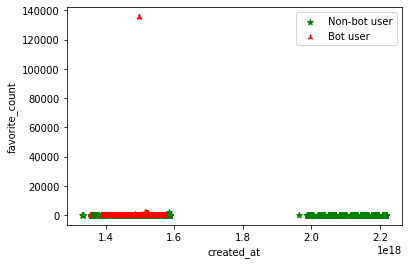

In [27]:
plt.scatter(df_merge[df_merge['bot'] == 0]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 0]['favorite_count'], color='g', marker='*', label='Non-bot user')
plt.scatter(df_merge[df_merge['bot'] == 1]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 1]['favorite_count'], color='r', marker='2', label='Bot user')
plt.xlabel('created_at')
plt.ylabel('favorite_count')
plt.legend()
plt.show()

For the number of replies, there is a trend inverse to the one of the retweets: most of the tweets which have a lot of replies are, surprisingly, published by bots.

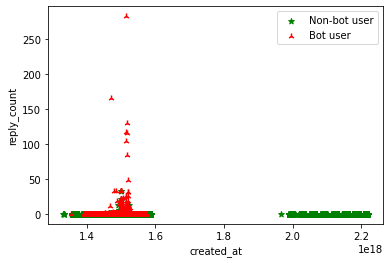

In [28]:
plt.scatter(df_merge[df_merge['bot'] == 0]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 0]['reply_count'], color='g', marker='*', label='Non-bot user')
plt.scatter(df_merge[df_merge['bot'] == 1]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 1]['reply_count'], color='r', marker='2', label='Bot user')
plt.xlabel('created_at')
plt.ylabel('reply_count')
plt.legend()
plt.show()

In [ ]:
plt.scatter(df_merge[df_merge['bot'] == 0]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 0]['num_hashtags'], color='g', marker='*', label='Non-bot user')
plt.scatter(df_merge[df_merge['bot'] == 1]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 1]['num_hashtags'], color='r', marker='2', label='Bot user')
plt.xlabel('created_at')
plt.ylabel('num_hashtags')
plt.legend()
plt.show()

In [ ]:
plt.scatter(df_merge[df_merge['bot'] == 0]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 0]['num_urls'], color='g', marker='*', label='Non-bot user')
plt.scatter(df_merge[df_merge['bot'] == 1]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 1]['num_urls'], color='r', marker='2', label='Bot user')
plt.xlabel('created_at')
plt.ylabel('num_urls')
plt.legend()
plt.show()

In [ ]:
plt.scatter(df_merge[df_merge['bot'] == 0]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 0]['num_mentions'], color='g', marker='*', label='Non-bot user')
plt.scatter(df_merge[df_merge['bot'] == 1]['created_at_conv_x'], 
            df_merge[df_merge['bot'] == 1]['num_mentions'], color='r', marker='2', label='Bot user')
plt.xlabel('created_at')
plt.ylabel('num_mentions')
plt.legend()
plt.show()

In [25]:
df_merge

,user_id,created_at_x,text,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at_conv_x,lang,bot,created_at_y,statuses_count,created_at_conv_y
0,2353593986,2019-07-11 03:49:06,"@4fri2endly0 ""A business that makes nothing bu...",0,0,0,0,0,1,1562816946000000000,en,1,2019-02-22 18:00:42,76.0,1550858442000000000
1,2353593986,2019-06-21 08:05:13,"""Happiness is not a station you arrive at, but...",0,0,0,0,0,0,1561104313000000000,en,1,2019-02-22 18:00:42,76.0,1550858442000000000
2,2353593986,2019-04-05 12:41:00,Music flow.,0,0,0,0,0,0,1554468060000000000,en,1,2019-02-22 18:00:42,76.0,1550858442000000000
3,2353593986,2019-07-25 12:17:31,@_SimplyKC follow meeee...,0,0,0,0,0,1,1564057051000000000,en,1,2019-02-22 18:00:42,76.0,1550858442000000000
4,2353593986,2019-04-29 20:55:05,"""You are the only person on earth who can use ...",0,0,0,0,0,0,1556571305000000000,en,1,2019-02-22 18:00:42,76.0,1550858442000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11277758,933183398,2020-04-27 22:01:39,RT @FemaIeThings: being disrespected by the pp...,1,0,0,0,0,1,1588024899000000000,en,0,2017-11-09 23:24:16,5279.0,1510269856000000000
11277759,933183398,2020-02-27 23:35:52,@_Freak_x1,0,0,0,0,0,0,1582846552000000000,en,0,2017-11-09 23:24:16,5279.0,1510269856000000000
11277760,933183398,2020-03-30 19:12:47,Something wrong,1,0,0,0,0,0,1585595567000000000,en,0,2017-11-09 23:24:16,5279.0,1510269856000000000
11277761,933183398,2020-04-24 13:52:39,always going over my data,0,0,0,0,0,0,1587736359000000000,en,0,2017-11-09 23:24:16,5279.0,1510269856000000000


In [6]:
df_tweets

,user_id,created_at,text,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at_conv
0,327746321,2019-09-11 14:53:55,"If man is a little lower than angels, then ang...",0,0,0,0,0,0,1568213635000000000
1,333722906,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit...",0,0,0,0,0,1,1585772824000000000
2,2379755827,2019-05-02 13:34:31,@LOLatComedy awsome,0,0,0,0,0,1,1556804071000000000
3,466226882,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...,0,0,0,0,0,0,1572851857000000000
4,1355537995,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!,112,0,0,1,0,1,1583945131000000000
...,...,...,...,...,...,...,...,...,...,...
11712343,220933018,2018-05-04 05:29:33,ESTA MANANA AUN ESTA MUY FRIO ! MIREN ESTO ! ...,0,0,0,0,0,0,1525411773000000000
11712344,587491046,2020-04-17 02:51:53,"@warriors Congrats, maybe I'll be able to get ...",0,0,0,0,0,1,1587091913000000000
11712345,91781300,2016-07-10 22:43:09,NaN,0,0,0,0,0,0,1468190589000000000
11712346,127895572,2019-03-07 19:56:55,Shooting crew of porn movies. #TheWorstJobToHave,0,0,0,1,0,0,1551988615000000000


In [18]:
df_users

,id,name,lang,bot,created_at,statuses_count,created_at_conv
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0,1550858442000000000
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0,1551150152000000000
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0,1430377796000000000
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0,1484707758000000000
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0,1560886221000000000
...,...,...,...,...,...,...,...
11503,2911861962,Madrid Lae Maika .,en,0,2019-11-29 13:16:02,1126.0,1575033362000000000
11504,1378532629,Clau Sato,en,0,2018-04-27 03:01:58,3024.0,1524798118000000000
11505,126984069,ALMA LETICIA NUÑO,es,0,2015-03-29 17:01:24,6.0,1427648484000000000
11506,2383025796,Minnie Guadagno,en,1,2019-03-13 02:44:13,42.0,1552445053000000000
